# Phishing URL Dataset Analysis 📊

### Preview of Dataset

In [129]:
import pandas as pd
import math
import re
from urllib.parse import urlparse
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score

import numpy as np

In [43]:
dataset_count = 60000

In [44]:
df_phish = pd.read_csv("SimpleExtension/datasets/verified_online.csv")
df_benign = pd.read_csv('SimpleExtension/datasets/top-1m.csv', header=None, names=['rank', 'domain'])


In [45]:
df_phish.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,9060784,https://txtag.org-lgco.vip/,http://www.phishtank.com/phish_detail.php?phis...,2025-04-14T09:01:17+00:00,yes,2025-04-14T12:12:08+00:00,yes,Other
1,9060781,https://txtag.org-kzgt.vip/,http://www.phishtank.com/phish_detail.php?phis...,2025-04-14T09:01:04+00:00,yes,2025-04-14T12:12:08+00:00,yes,Other
2,9060779,https://txtag.org-hujf.vip/,http://www.phishtank.com/phish_detail.php?phis...,2025-04-14T09:00:45+00:00,yes,2025-04-14T12:12:08+00:00,yes,Other
3,9060778,https://txtag.org-hkrc.vip/,http://www.phishtank.com/phish_detail.php?phis...,2025-04-14T09:00:23+00:00,yes,2025-04-14T12:12:08+00:00,yes,Other
4,9060777,https://txtag.org-fqlt.vip/,http://www.phishtank.com/phish_detail.php?phis...,2025-04-14T09:00:08+00:00,yes,2025-04-14T12:12:08+00:00,yes,Other


In [46]:
phishing_urls = df_phish['url'].dropna().sample(n=dataset_count, random_state=42).tolist()
phishing_urls

['https://l.wl.co/l?u=https://qr-codes.io/dBL24Y',
 'https://atttjsjsupport.webflow.io/',
 'https://jdvcqs.e-scurefiles.net/',
 'https://l.ead.me/bfPT6O',
 'https://allegrolokalnie.id8791244.shop/',
 'https://l.ead.me/bfJb0t',
 'https://zfechtp.xin/',
 'https://ezpass.com-etcoe.xin/',
 'https://appeal-check.firebaseapp.com/',
 'http://rastrobel.com.br/esfera/gomeuspontos864',
 'https://t.co/TW6S3CIuBi',
 'https://1291823.weebly.com/',
 'https://gsuaplysutelta.weebly.com/',
 'https://bit.ly/3Uc4ZzN',
 'https://cgd-invalidarpt.com/',
 'https://onlineaccess-3riversfcu.firebaseapp.com/',
 'https://e-zpassny.com-ert.vip/',
 'https://bozpprofi.cz/?url=https://fx18042023fxdocs93w81-1317797611.cos.ap-chengdu.myqcloud.com/f.html',
 'https://docs.google.com/presentation/d/e/2PACX-1vSVTEq-NBDdpAArybQflmSD9j84R9Br9zCjUbhXZpvf3CnBxVWapBqrVbYuIXlF5fZHK5lSn4r5fwrq/pub?start=false&amp;loop=false&amp;delayms=3000',
 'https://evrimail.online-servicessc.xin/',
 'https://new.express.adobe.com/webpage/5suM

In [47]:
df_benign.head()

,rank,domain
0,1,google.com
1,2,microsoft.com
2,3,mail.ru
3,4,root-servers.net
4,5,facebook.com


In [48]:
benign_urls = ['https://' + d for d in df_benign['domain'].sample(n=dataset_count, random_state=42)]
benign_urls

['https://o-pa.org',
 'https://sales-crowd.jp',
 'https://regiontehsnab.ru',
 'https://helpnet-es.net.br',
 'https://fidh.org',
 'https://flashpoint.io',
 'https://alberto.com.ph',
 'https://accidentrescue.in',
 'https://uludagsozluk.com',
 'https://8k8app4.com',
 'https://otzyv.eu',
 'https://freesoft.org',
 'https://tierschutzverein-deggendorf.de',
 'https://ya-trader.com',
 'https://belowthebelt.com',
 'https://audar-info.ru',
 'https://apmdns.com',
 'https://izlenseflpalt27.shop',
 'https://centerforinquiry.net',
 'https://wexer.com',
 'https://skybbs.biz',
 'https://fundex.exchange',
 'https://premierpluss.com',
 'https://airpho.com',
 'https://3ctch.com',
 'https://pgsoftwallet.com',
 'https://careerindex.jp',
 'https://cyim.com',
 'https://piksel.tech',
 'https://playpokerogue.com',
 'https://humoronline.com',
 'https://mxptint.net',
 'https://zelesta.de',
 'https://julius-randle-az.com',
 'https://chinhosting.com',
 'https://vegaformazione.it',
 'https://lustfilms.com',
 'https

Mark Data

In [50]:
df.head()

,url_length,dot_count,has_at,special_char_count,entropy,suspicious_keywords,subdomain_length,is_ip,label
0,46,2,False,2,2.235926,0,1,False,1
1,34,2,False,0,3.733661,0,14,False,1
2,32,2,False,1,3.795089,0,6,False,1
3,23,2,False,0,2.500000,0,1,False,1
4,39,2,False,0,4.148394,0,15,False,1


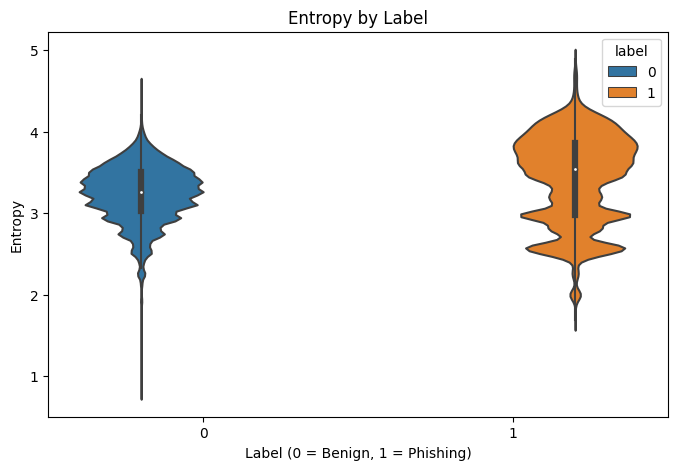

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='label', y='entropy', hue='label')
plt.title('Entropy by Label')
plt.xlabel('Label (0 = Benign, 1 = Phishing)')
plt.ylabel('Entropy')
plt.show()

In [101]:
print(len(df[(df['label'] == 1) & (df['entropy'] > threshold)]), len(df[(df['label'] == 0) & (df['entropy'] > threshold)]))

10707 376


In [102]:
len(df[(df['label'] == 1) & (df['entropy'] > threshold)])/len(df[(df['label'] == 0) & (df['entropy'] > threshold)])


28.476063829787233

In [123]:
df['id'] = df.index
df = df[df['url_length'] < 20]

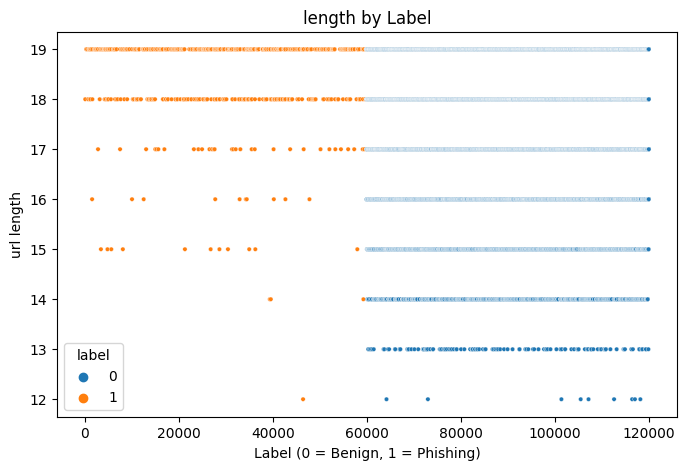

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='id', y='url_length', hue='label',s=10)
plt.title('length by Label')
plt.xlabel('Label (0 = Benign, 1 = Phishing)')
plt.ylabel('url length')
plt.show()

In [130]:
# Label data
urls = phishing_urls + benign_urls
labels = [1]*len(phishing_urls) + [0]*len(benign_urls)
# Feature extraction
def extract_features(url):
    parsed = urlparse(url)
    hostname = parsed.hostname or ''
    full_url = url.lower()
    specials = ['%', '-', '=', '&', ';']
    keywords = ['login', 'verify', 'secure', 'account', 'signin']

    def entropy(domain):
        counts = {char: domain.count(char) for char in set(domain)}
        length = len(domain)
        return -sum((f / length) * math.log2(f / length) for f in counts.values())
    
    raw_entropy = entropy(hostname)
    entropy_binary = 1 if raw_entropy > 3.9 else 0  # Binary conversion

    return {
        'url_length': len(full_url),
        'dot_count': hostname.count('.'),
        'has_at': '@' in full_url,
        'special_char_count': sum(full_url.count(ch) for ch in specials),
        'entropy': raw_entropy,
        'suspicious_keywords': sum(kw in full_url for kw in keywords),
        'subdomain_length': sum(len(part) for part in hostname.split('.')[:-2]) if hostname.count('.') >= 2 else 0,
        'is_ip': bool(re.match(r'^\d{1,3}(\.\d{1,3}){3}$', hostname))
    }

# Build dataframe
features = [extract_features(url) for url in urls]
df = pd.DataFrame(features)
df['label'] = labels

X = df.drop("label", axis=1)
y = df["label"]

# Normalize features - use RobustScaler to handle outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# RFE for feature selection - Recursive Feature Elimination
print("\nPerforming Recursive Feature Elimination (RFE)...")
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_scaled, y)
print("RFE-selected:", X.columns[fit.support_])

# choose the best features
X_selected = X_scaled[:, fit.support_]

# Cross-validation with multiple k values
print("\nEvaluating model with k-fold cross-validation:")
k_options = [3, 5, 7, 10, 15]
best_k = None
best_score = 0

for k in k_options:
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    model = LogisticRegression()
    scores = cross_val_score(model, X_selected, y, cv=skf, scoring='accuracy')
    mean_score = scores.mean()
    print(f"k={k} | Mean Accuracy: {mean_score:.4f}")
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f"\nBest k found: {best_k} with accuracy: {best_score:.4f}")


# Final training on the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

final_model = LogisticRegression()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Classification report
y_probs = final_model.predict_proba(X_test)[:, 1]  # סיכוי לפישינג


# Export model weights
print("\nJavaScript-ready weights:")
print("const weights = {")
for name, coef in zip(X.columns, final_model.coef_[0]):
    print(f"  {name}: {coef:.4f},")
print("};")
print(f"const bias = {final_model.intercept_[0]:.4f};")

# Evaluate model performance
print("\nEvaluating model performance...")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"True Positive Rate (TPR / Recall): {tpr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


Performing Recursive Feature Elimination (RFE)...
RFE-selected: Index(['url_length', 'dot_count', 'has_at', 'entropy', 'is_ip'], dtype='object')

Evaluating model with k-fold cross-validation:
k=3 | Mean Accuracy: 0.8819
k=5 | Mean Accuracy: 0.8812
k=7 | Mean Accuracy: 0.8809
k=10 | Mean Accuracy: 0.8808
k=15 | Mean Accuracy: 0.8808

Best k found: 3 with accuracy: 0.8819

JavaScript-ready weights:
const weights = {
  url_length: 6.5196,
  dot_count: 1.9785,
  has_at: 1.7990,
  special_char_count: -2.8843,
  entropy: 1.4199,
};
const bias = -1.4098;

Evaluating model performance...
Precision: 0.9017
Recall: 0.8580
F1 Score: 0.8793


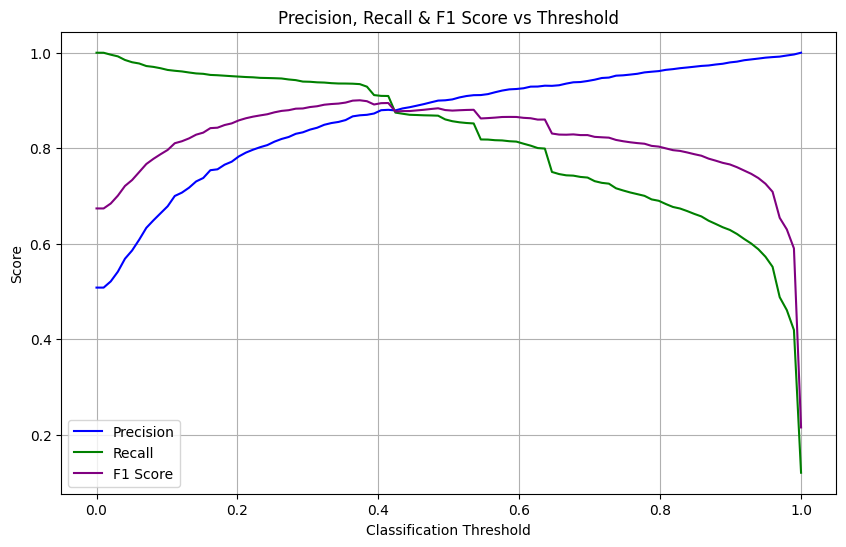

In [135]:
# Calculate precision (how much out of the phishing sites are detected)
# for thresholds from 0.0 to 1.0
thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []
f1_scores = []

# Calculate precision, recall, and F1 score for each threshold
for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# Plot all three metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.plot(thresholds, f1_scores, label='F1 Score', color='purple')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall & F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_idx, best_threshold

(37, 0.37373737373737376)

### K-Means Clustering Result

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_features['cluster'], palette='viridis')
plt.title('K-Means Clustering (2D Projection)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

### Logistic Regression Weights & Bias

In [ ]:
import pandas as pd
feature_names = X.columns
weights = pd.Series(model.coef_[0], index=feature_names)
weights.plot(kind='barh', figsize=(8,6), title='Feature Weights')
plt.axvline(0, color='red', linestyle='--')
plt.show()
print(f'Bias: {model.intercept_[0]:.4f}')

### Cross-Validation Accuracy

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
k_values = [3, 5, 7, 10]
for k in k_values:
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(LogisticRegression(), X_scaled, y, cv=skf, scoring='accuracy')
    print(f'k={k}: Accuracy = {scores.mean():.4f}')